# Assignment 3<br>

Import the data from [fraud_data.csv](fraud_data.csv).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, precision_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from IPython.display import display

df = pd.read_csv('fraud_data.csv')

cols_wNA = df.isna().any(axis=0)
print('Columns containing NA values:')
print(cols_wNA)
print()
print('Labels present in the target "Class" column: ', df['Class'].unique())

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

df

Columns containing NA values:
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

Labels present in the target "Class" column:  [0 1]


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21688,-3.959670,3.297819,-1.079436,-2.290106,-1.405133,2.452586,-4.649235,-12.365464,0.409493,1.251992,...,12.617463,-2.969195,1.755050,0.433324,-0.010827,-0.126613,0.200111,-0.160542,29.95,0
21689,-1.066503,0.539240,0.735343,-0.506800,0.843980,-1.047877,1.141302,-0.127448,-0.119221,-1.870265,...,-0.162535,-0.576352,-0.184969,-0.136154,0.760012,0.048105,-0.017475,0.092365,85.66,0
21690,-2.175162,-0.441681,1.883137,-0.267440,1.056972,0.136404,0.113595,-0.055983,0.765616,-0.087568,...,-0.201561,0.397761,-0.855500,-0.627900,0.590977,0.515065,0.433089,-0.150291,131.10,0
21691,0.031406,0.694817,0.083233,-0.797912,0.564318,-0.560787,0.805901,0.051453,-0.053817,-0.200190,...,-0.255891,-0.664635,0.018844,-0.539177,-0.504019,0.155133,0.232846,0.079420,4.49,0


## Question 1<br>

What percentage of the observations in the dataset are instances of fraud?  
<br>
*This function should return a float between 0 and 1.*

In [2]:
def answer_one():
    fraud_perc = df['Class'].sum() / len(df)
    
    return fraud_perc

answer_one()

0.016410823768035772

## Question 2<br>

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?  
<br>
*This function should return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [3]:
def answer_two():
    dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
    dummy_predictions = dummy_majority.predict(X_test)
    accuracy = dummy_majority.score(X_test, y_test)
    recall = recall_score(y_test, dummy_predictions)
    
    return (accuracy, recall)

answer_two()

(0.9852507374631269, 0.0)

## Question 3<br>

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a SVC classifier using the default parameters. What is the accuracy, recall, and precision of this classifier?  
<br>
*This function should retrun a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [4]:
def answer_three():
    svm = SVC().fit(X_train, y_train)
    svm_predicted = svm.predict(X_test)
    accuracy = svm.score(X_test, y_test)
    recall = recall_score(y_test, svm_predicted)
    precision = precision_score(y_test, svm_predicted)
    print(confusion_matrix(y_test, svm_predicted))
    
    return (accuracy, recall, precision)

answer_three()

[[5342    2]
 [  52   28]]


(0.9900442477876106, 0.35, 0.9333333333333333)

## Question 4<br>

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-7}`, what is the confusion matrix when using a threshold of -220 on the decision function? Use `X_test` and `y_test`.  
<br>
*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [5]:
def answer_four():
    svm = SVC(C=1e9, gamma=1e-7).fit(X_train, y_train)
    svm_scores = svm.decision_function(X_test)
    svm_predicted = np.where(svm_scores >= -220, 1, 0) ## np.where(condition, x, y) Where condition is True, x is used. y is used where condition is False
    conf_matrix = confusion_matrix(y_test, svm_predicted)
#     print(svm.classes_)
#     print(svm_scores.shape)
#     print(max(svm_scores), min(svm_scores))
    return conf_matrix

answer_four()

array([[5320,   24],
       [  14,   66]])

## Question 5<br>

Train a logistic regression classifier with default parameters using `X_train` and `y_train`.  
<br>
For the logistic regression classifier <code style="background:cyan;color:black">(with `solver='liblinear'`)</code>, create a precision recall curve and a ROC curve using `y_test` and the probability estimates for `X_test` (probability it is fraud).  
<br>
Looking at the precision recall curve, what is the recall when the precision is `0.75`?  
<br>
Looking at the ROC curve, what is the true positive rate when the false positive rate is `0.16`? <code style="background:cyan;color:black">(There are 2 such points. Take the point with the higher TPR.)</code>  
<br>
*The highlighted portions are added information (not given in the initial problem description) necessary to properly answer this question (per the autograder and the scikit-learn version it relies on). This info comes from a course staff member [here](https://www.coursera.org/learn/python-machine-learning/discussions/forums/V4d0GfJGEeyFLA7-B9YT0Q/threads/vBlAwbfSEe2Rxw5vmkBsRw).*  
<br>
*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

Precision: [0.75]	Recall: [0.825]
FPR: [0.15961826 0.15961826]	TPR: [0.9375 0.95  ]


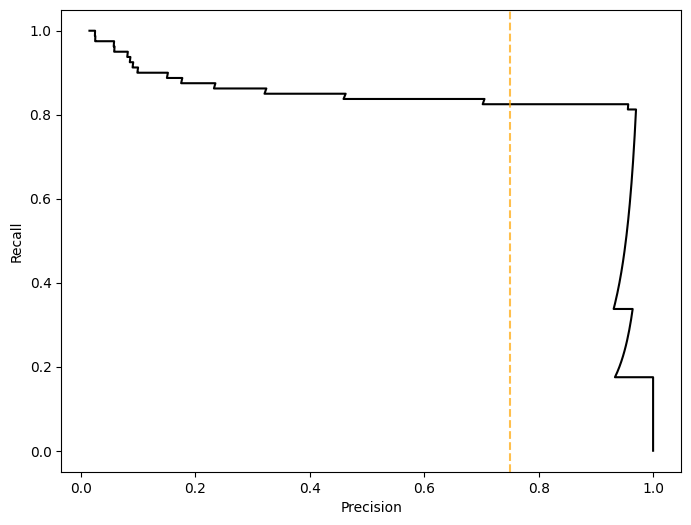

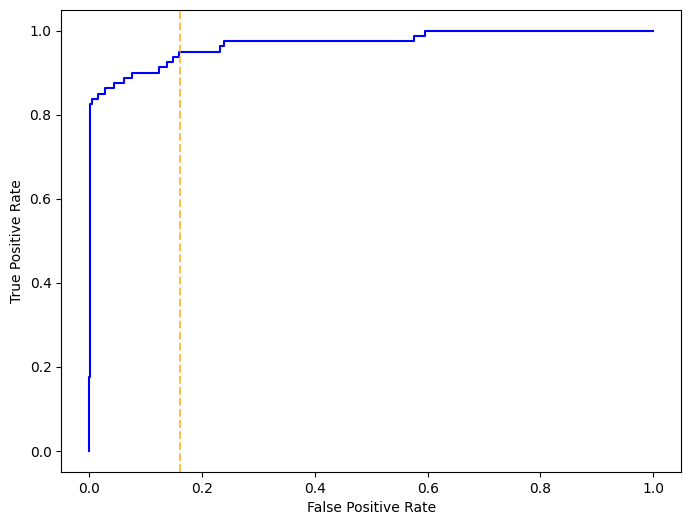

(0.825, 0.95)

In [14]:
def answer_five():
    lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
    lr_probs = lr.predict_proba(X_test)[:,1]
#     print(y_test.shape)
#     print(lr_probs.shape)
#     print(lr_probs)
#     print(lr.classes_)
    precision, recall, _ = precision_recall_curve(y_test, lr_probs)
    fpr, tpr, _ = roc_curve(y_test, lr_probs)
    
    abs_diff_prec = np.abs(np.subtract(precision, 0.75))
    abs_diff_fpr  = np.abs(np.subtract(fpr, 0.16))
    
    closest_prec_idx = np.where(abs_diff_prec == min(abs_diff_prec))[0]
    closest_fpr_idx  = np.where(abs_diff_fpr == min(abs_diff_fpr))[0]
    
    print('Precision: {}\tRecall: {}'.format(precision[closest_prec_idx], recall[closest_prec_idx]))
    print('FPR: {}\tTPR: {}'.format(fpr[closest_fpr_idx], tpr[closest_fpr_idx]))
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(precision, recall, linestyle='-', color='black')
    ax.axvline(x = 0.75, linestyle='--', color='orange', alpha=0.7)
    ax.set_xlabel('Precision')
    ax.set_ylabel('Recall')
    plt.show()
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(fpr, tpr, linestyle='-', color='blue')
    ax.axvline(x = 0.16, linestyle='--', color='orange', alpha=0.7)
#     ax.axhline(y = 0.9375, linestyle='--', linewidth=0.5, color='black')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    plt.show()
    
    return (recall[closest_prec_idx[0]], max(tpr[closest_fpr_idx]))

answer_five()

## Question 6<br>

Perform a grid search over the parameters listed below for a Logistic Regression classifier, using recall for scoring and <code style="background:cyan;color:black">5</code>-fold cross validation (Suggest using `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)).  
<br>
`'penalty': ['l1', 'l2']`  
<br>
`'C': [0.01, 0.1, 1, 10]`  
<br>
From `.cv_results_`, create an array of the mean test scores of each parameter combination, i.e.  
<br>
| | `l1` | `l2` |
| :- | :-: | :-: |
| **`0.01`** | ? | ? |
| **`0.1`** | ? | ? |
| **`1`** | ? | ? |
| **`10`** | ? | ? |  

<br>

*It turns out that the default `cv=5` for scikit-learn version $\geq$ 0.22 is needed here, contrary to the old default of 3 listed in the problem description. Idea from [here](https://www.coursera.org/learn/python-machine-learning/discussions/weeks/3/threads/eR0g4QHjEe6BSgplJETtwQ).*  
<br>
*This function should return a 4x2 numpy array with 8 floats.*  
<br>
*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [15]:
def answer_six():
    lr = LogisticRegression(solver='liblinear')
    grid_values = {'penalty': ['l1', 'l2'],
                   'C': [0.01, 0.1, 1., 10.]
                  }
    grid_lr_recall = GridSearchCV(lr, param_grid=grid_values, scoring='recall')
    grid_lr_recall.fit(X_train, y_train)
    grid_cv_results_df = pd.DataFrame(grid_lr_recall.cv_results_)
    
    display(grid_cv_results_df)
    
    mean_test_scores_l1 = grid_cv_results_df[grid_cv_results_df['param_penalty'] == 'l1'][['param_C', 'mean_test_score']]
    mean_test_scores_l2 = grid_cv_results_df[grid_cv_results_df['param_penalty'] == 'l2'][['param_C', 'mean_test_score']]
    
    display(mean_test_scores_l1)
    display(mean_test_scores_l2)
    
    merged_df = pd.merge(mean_test_scores_l1, mean_test_scores_l2, on='param_C', how='inner', suffixes=['_l1', '_l2']).set_index('param_C')
    
    display(merged_df)
    
    return merged_df.values

answer_six()    

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052326,0.001690,0.005435,0.001149,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.727273,0.654545,0.763636,0.714286,0.618182,0.695584,0.052269,8
1,0.122841,0.004807,0.005333,0.000865,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.818182,0.800000,0.781818,0.785714,0.672727,0.771688,0.051100,7
2,0.093874,0.012689,0.006006,0.001093,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.781818,0.836364,0.890909,0.821429,0.709091,0.807922,0.060543,3
3,0.220694,0.015196,0.005294,0.000333,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.800000,0.836364,0.890909,0.821429,0.709091,0.811558,0.059401,1
4,0.190253,0.032832,0.005072,0.000225,1.0,l1,"{'C': 1.0, 'penalty': 'l1'}",0.781818,0.836364,0.890909,0.821429,0.690909,0.804286,0.066612,4
5,0.266539,0.036065,0.005448,0.001201,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",0.800000,0.836364,0.890909,0.839286,0.690909,0.811494,0.066889,2
6,0.275531,0.070398,0.005378,0.000600,10.0,l1,"{'C': 10.0, 'penalty': 'l1'}",0.781818,0.836364,0.890909,0.821429,0.672727,0.800649,0.072901,5
7,0.354683,0.027292,0.005637,0.001647,10.0,l2,"{'C': 10.0, 'penalty': 'l2'}",0.781818,0.836364,0.890909,0.821429,0.672727,0.800649,0.072901,5


,param_C,mean_test_score
0,0.01,0.695584
2,0.1,0.807922
4,1.0,0.804286
6,10.0,0.800649


,param_C,mean_test_score
1,0.01,0.771688
3,0.1,0.811558
5,1.0,0.811494
7,10.0,0.800649


,mean_test_score_l1,mean_test_score_l2
param_C,,
0.01,0.695584,0.771688
0.1,0.807922,0.811558
1.0,0.804286,0.811494
10.0,0.800649,0.800649


array([[0.69558442, 0.77168831],
       [0.80792208, 0.81155844],
       [0.80428571, 0.81149351],
       [0.80064935, 0.80064935]])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.061122,0.006941,0.005963,0.001155,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.727273,0.654545,0.763636,0.714286,0.618182,0.695584,0.052269,8
1,0.155074,0.005651,0.007023,0.000790,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.818182,0.800000,0.781818,0.785714,0.672727,0.771688,0.051100,7
2,0.103250,0.010765,0.006039,0.000388,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.781818,0.836364,0.890909,0.821429,0.709091,0.807922,0.060543,3
3,0.279906,0.034773,0.006683,0.001311,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.800000,0.836364,0.890909,0.821429,0.709091,0.811558,0.059401,1
4,0.219445,0.022258,0.005885,0.000301,1.0,l1,"{'C': 1.0, 'penalty': 'l1'}",0.781818,0.836364,0.890909,0.821429,0.690909,0.804286,0.066612,4
5,0.318941,0.044941,0.005720,0.000123,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",0.800000,0.836364,0.890909,0.839286,0.690909,0.811494,0.066889,2
6,0.305961,0.066394,0.005815,0.000123,10.0,l1,"{'C': 10.0, 'penalty': 'l1'}",0.781818,0.836364,0.890909,0.821429,0.672727,0.800649,0.072901,5
7,0.367236,0.048978,0.005915,0.000344,10.0,l2,"{'C': 10.0, 'penalty': 'l2'}",0.781818,0.836364,0.890909,0.821429,0.672727,0.800649,0.072901,5


,param_C,mean_test_score
0,0.01,0.695584
2,0.1,0.807922
4,1.0,0.804286
6,10.0,0.800649


,param_C,mean_test_score
1,0.01,0.771688
3,0.1,0.811558
5,1.0,0.811494
7,10.0,0.800649


,mean_test_score_l1,mean_test_score_l2
param_C,,
0.01,0.695584,0.771688
0.1,0.807922,0.811558
1.0,0.804286,0.811494
10.0,0.800649,0.800649


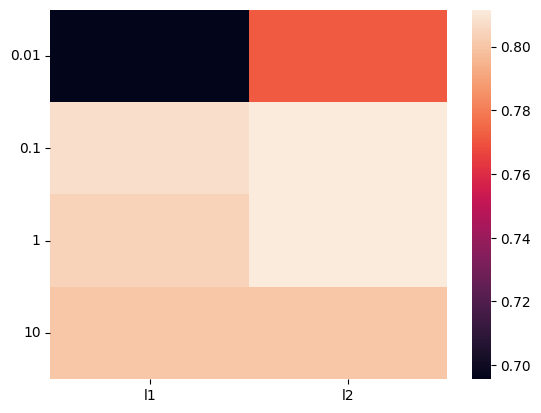

In [16]:
# Use the following function to help visualize results from the grid search

def GridSearch_Heatmap(scores):
    plt.figure()
    sns.heatmap(scores, xticklabels=['l1', 'l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0)
    return

GridSearch_Heatmap(answer_six())